## About this simple and test image classification project


Here, my goal is to do simple problem of image recognition, with just a little bit of code, and no maths and get some conconclusion by changing the model parameters. Input is some images containing differnt handwritten numbers from 0 to 9 and we must train a classifier that can decide about classifying a new image to one of these 10 classes. 


## The digits dataset

scikit-learn comes with several test datasets. Let's load the handwritten digits dataset:

In [24]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Let's have a look in more details at some of these attributes. I am going to start by checking their type:

In [6]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


`images` and `target` are ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [26]:
digits.images.shape

(1797, 8, 8)

In [9]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Now let's display this image

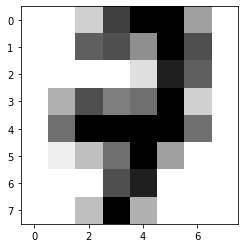

In [30]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[52],cmap='binary')
plt.show()

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits. 

Now let's investigate the target attribute: 

In [31]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above. 

Let's have a look at some more images using this function: 

In [13]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

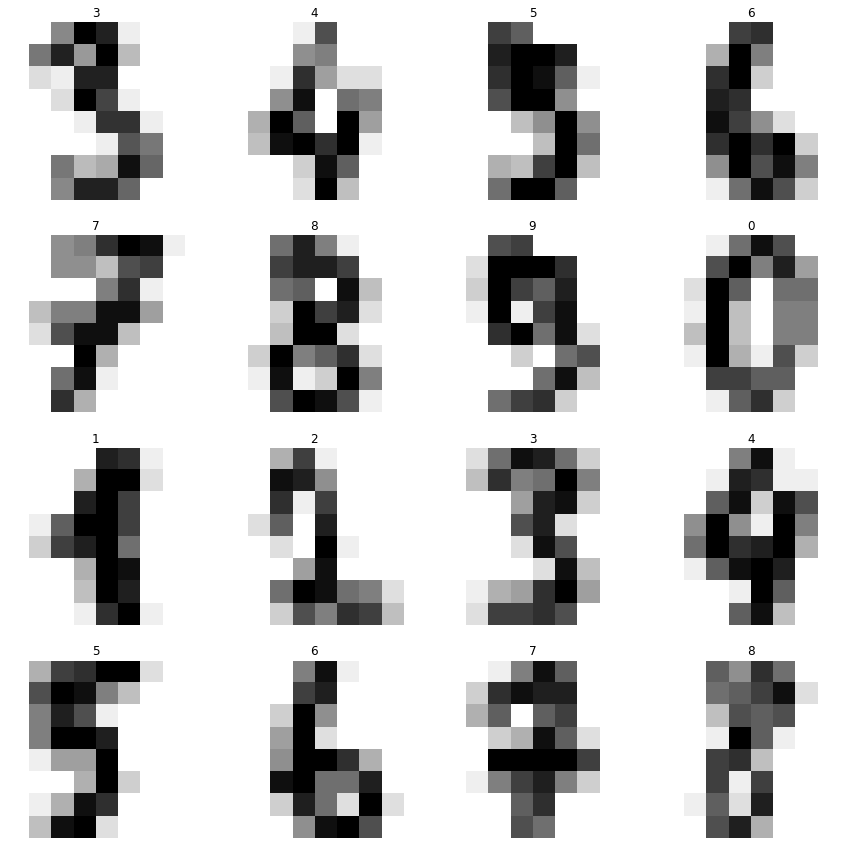

In [34]:
plot_multi(3)

## Using the network from scikit-learn and preparing the input data

The input layer requires a 1-dimensional array in input, but the images are 2D. So I have to flatten all images:

In [35]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. 

In [36]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

let's now split the data into a training sample and a testing sample:

In [17]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network. 

We can now create the neural network. We use one hidden layers with 15 neurons, and scikit-learn is smart enough to find out how many numbers to use in the input and output layers. 
 

I am going to set the parametrs like below:

activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1,learning_rate_init=.1, verbose=True

In [115]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(120,), activation='tanh', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)


In the next stage I trian the neural network model

In [116]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.95577303
Iteration 2, loss = 0.52758217
Iteration 3, loss = 0.18236841
Iteration 4, loss = 0.10353986
Iteration 5, loss = 0.06485839
Iteration 6, loss = 0.04245106
Iteration 7, loss = 0.02943680
Iteration 8, loss = 0.02237137
Iteration 9, loss = 0.01664639
Iteration 10, loss = 0.01309366
Iteration 11, loss = 0.01147553
Iteration 12, loss = 0.00984963
Iteration 13, loss = 0.00885962
Iteration 14, loss = 0.00809932
Iteration 15, loss = 0.00745963
Iteration 16, loss = 0.00694480
Iteration 17, loss = 0.00645814
Iteration 18, loss = 0.00608073
Iteration 19, loss = 0.00580290
Iteration 20, loss = 0.00548809
Iteration 21, loss = 0.00523280
Iteration 22, loss = 0.00501122
Iteration 23, loss = 0.00480608
Iteration 24, loss = 0.00459051
Iteration 25, loss = 0.00442183
Iteration 26, loss = 0.00426158
Iteration 27, loss = 0.00410990
Iteration 28, loss = 0.00397165
Iteration 29, loss = 0.00384974
Iteration 30, loss = 0.00371934
Iteration 31, loss = 0.00360462
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(120,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

 Now the network has been trained, let's see what it can say about the test images

In [117]:
predictions = mlp.predict(x_test)
predictions[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

 Let's check by eye and compare the values of these arrays by printing the true labels for the 1st 50 images in the test sample.

In [118]:
y_test[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

I use accuracy_score function to compute the accuracy easily

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9360100376411543